In [39]:
pip install dash

  Using cached dash-2.14.1-py3-none-any.whl.metadata (11 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
  Using cached ansi2html-1.8.0-py3-none-any.whl (16 kB)
Using cached dash-2.14.1-py3-none-any.whl (10.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

In [4]:
filepath = '/Users/jacquelinethibault/Desktop/ResponseApproximation/fa23urap/test3.txt' #result from thebeTest
df = pd.read_csv(filepath, delimiter = ',')

In [5]:
df.head()

,Unnamed: 0,Event ID,Energy,Theta,Phi,Scatter Angle,Path Length (cm),Theta Bin,Phi Bin,Scatter Angle Bin
0,0,1,509.8545,95.111090,-79.695154,22.103606,1.122497,96.630738,-74.931512,23.016826
1,1,2,510.7631,90.000000,-45.000000,40.497715,0.282843,90.000000,-45.000000,41.500863
2,2,3,509.1930,165.046589,33.690068,82.068576,2.794638,180.000000,43.264295,83.771117
3,3,4,511.8270,103.109018,-152.241459,63.178452,2.204541,103.240520,-137.726311,63.850514
4,4,6,510.1480,170.251968,-104.036243,68.882363,2.435159,180.000000,-103.348727,72.330605


exploring how far from avg the number of items in each bin are.

In [6]:
meanitems=df.groupby('Phi Bin').count().iloc[:,0].mean()#.append(df.groupby('Phi Bin').count().iloc[9:,0]).mean()
display(meanitems - df.groupby('Phi Bin').count().iloc[:,0])
display(meanitems)

Phi Bin
-165.173520     14403.947368
-137.726311     14087.947368
-124.159695     14704.947368
-113.198591     14391.947368
-103.348727     14428.947368
-90.000000    -261889.052632
-74.931512      16987.947368
-64.536655      14236.947368
-55.007980      13796.947368
-45.000000       4896.947368
-23.198591      24621.947368
-0.000000     -172385.052632
 14.036243     199487.947368
 43.264295      16197.947368
 66.801409      14357.947368
 90.000000     -54140.052632
 120.963757     82742.947368
 148.671307     14659.947368
 179.530373     14408.947368
Name: Unnamed: 0, dtype: float64

288114.94736842107

dropped the weird 90 and 0 data

In [54]:
df_dropped = df[df['Theta'] != 90][df['Phi'] != -90][df['Phi'] != 0][df['Phi']!=90]
meanitems=df_dropped.groupby('Phi Bin').count().iloc[:,0].mean()#.append(df.groupby('Phi Bin').count().iloc[9:,0]).mean()
display(meanitems - df_dropped.groupby('Phi Bin').count().iloc[:,0])

/var/folders/0p/p_3sbhs92f1cbn5q60vgrkxw0000gn/T/ipykernel_44923/2273803363.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Phi Bin
-165.173520     13536.578947
-137.726311    -32680.421053
-124.159695    -18678.421053
-113.198591    -27911.421053
-103.348727    -32127.421053
-90.000000     -14577.421053
-74.931512     -35619.421053
-64.536655     -34072.421053
-55.007980     -27545.421053
-45.000000     -25646.421053
-23.198591     -22711.421053
-0.000000       72687.578947
 14.036243     139273.578947
 43.264295     -28445.421053
 66.801409     -13414.421053
 90.000000     101299.578947
 120.963757     34117.578947
 148.671307    -16900.421053
 179.530373    -30584.421053
Name: Unnamed: 0, dtype: float64

In [62]:
#df.sort_values(by='Scatter Angle Bin').groupby('Scatter Angle Bin').count().index
np.sort(df['Scatter Angle Bin'].unique())

array([ 18.86019372,  23.01682591,  26.9141888 ,  30.64293167,
        34.24417553,  37.8168135 ,  41.50086348,  45.30421865,
        49.33871276,  53.73924469,  58.44100575,  63.85051434,
        72.33060542,  83.7711166 ,  94.5099787 , 103.50121702,
       113.82857547, 125.75410468, 140.42414372, 179.91867374])

In [66]:
def addLowerBound(newdf):

    phi = np.sort(newdf['Phi Bin'].unique()) #-180 to 180
    theta = np.sort(newdf['Theta Bin'].unique()) # 0 to 180
    sc = np.sort(newdf['Scatter Angle Bin'].unique()) #0 to 180
    vardict = {0: phi, 1: theta, 2: sc}
    stringdict = {0: 'Phi Bounds', 1: 'Theta Bounds', 2: 'Scatter Angle Bounds'}
    oldstringdict = {0: 'Phi Bin', 1: 'Theta Bin', 2: 'Scatter Angle Bin'}
    dictmaps = {}
    for i in range(3):
        var = vardict[i]
        varstring = stringdict[i]
        bounded = []
        lowerbound = 0
        if varstring == 'Phi Bounds':
            lowerbound = -180
        for upperbound in var:
            bounded.append(f'{lowerbound}-{upperbound}')
            dictmaps[upperbound] = bounded[-1]
            lowerbound = upperbound
        newdf[varstring] = [dictmaps[value] for value in newdf[oldstringdict[i]]]
    return newdf

df=addLowerBound(df)
    

In [72]:
bincounts = df.groupby(['Theta Bounds', 'Phi Bounds', 'Scatter Angle Bounds']).count().iloc[:,0]

In [93]:
bincountspopped = bincounts[bincounts != np.max(bincounts)]

most of the bins have few items

In [101]:
display(np.mean(bincounts))
display(np.median(bincounts))

758.1972299168975

226.0

(0.0, 5000.0)

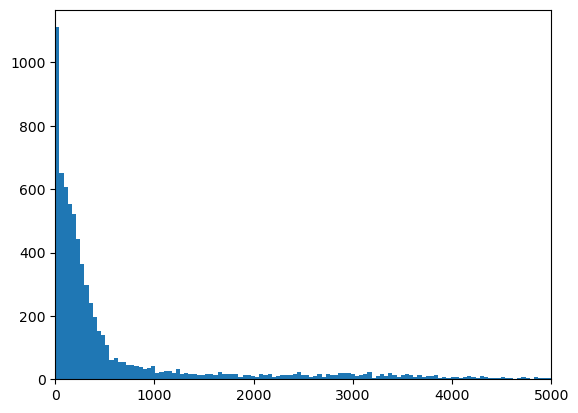

In [100]:
plt.hist(bincountspopped, bins = 500)
plt.xlim(0, 5000)

## VISUALIZATIONS

Binned data. 1 dot = 1 bin. size of dot = density of points in this bin. ideally should all be around the same size if bins are finer around cone. since each dimension for now only has 20 bins, mayhaps need to add more to see this better, and/or increase how strict the occupancy changes are across bins during the binning process

In [129]:
#bincounts_df=pd.DataFrame(df.groupby(['Theta Bounds', 'Phi Bounds', 'Scatter Angle Bounds']).count().iloc[:,0]).reset_index()
bincounts_upper = pd.DataFrame(df.groupby(['Theta Bin', 'Phi Bin', 'Scatter Angle Bin']).count().iloc[:,0]).reset_index()
bincounts_all = addLowerBound(bincounts_upper)
bincounts_all = bincounts_all.rename(columns={'Unnamed: 0': 'count'})

In [132]:
px.scatter_3d(bincounts_all, x='Theta Bin', y='Phi Bin', z='Scatter Angle Bin', color = 'Scatter Angle Bin', size = 'count', size_max = 50)

In [135]:
app = Dash(__name__)

app.layout = html.Div([
    html.H4('cds filtered by scatter angle bin'),
    dcc.Graph(id="graph"),
    html.P("Scatter Angle:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=180, step=1,
        marks={0: '0', 180: '180'},
        value=[0, 180]
    ),
])

@app.callback(
    Output("graph", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = bincounts_all
    low, high = slider_range
    mask = (df['Scatter Angle Bin'] > low) & (df['Scatter Angle Bin'] < high)

    fig = px.scatter_3d(df[mask], 
        x='Theta Bin', y='Phi Bin', z='Scatter Angle Bin',
        color="Scatter Angle Bin" , size = 'count', size_max=40)
    return fig

app.run_server(debug=True)

In [102]:
justbins_df_sampled= justbins_df.sample(n=500)
df_sampled = df.sample(n=5000) #[df['Scatter Angle'] < 60][df['Scatter Angle'] > 40]
df_sampled

,Unnamed: 0,Event ID,Energy,Theta,Phi,Scatter Angle,Path Length (cm),Theta Bin,Phi Bin,Scatter Angle Bin,Phi Bounds,Theta Bounds,Scatter Angle Bounds
3191608,3191608,5829646,510.0370,90.000000,-127.568592,42.648296,1.640122,90.000000,-124.159695,45.304219,-137.72631099390625--124.15969454566957,88.53886098080434-90.0,41.500863484161954-45.304218649357786
5348167,5348167,9769142,507.2280,66.533295,60.255119,62.829456,1.757840,68.198591,66.801409,63.850514,43.26429541107177-66.80140948635187,61.094380558772-68.19859051364863,58.44100574865117-63.85051434218983
4172533,4172533,7621958,512.2610,74.498640,33.690068,143.269865,0.374166,74.769353,43.264295,179.918674,14.03624346792648-43.26429541107177,68.19859051364863-74.76935306154004,140.4241437184844-179.91867374142737
2026570,2026570,3701881,510.9050,39.159751,142.125016,135.594171,1.805547,45.000000,148.671307,140.424144,120.96375653207448-148.67130713219595,27.79130564477977-44.99999999999796,125.75410467623404-140.4241437184844
2978312,2978312,5440054,510.0150,129.348038,63.434949,118.838247,1.734935,133.491519,66.801409,125.754105,43.26429541107177-66.80140948635187,126.03989343030324-133.49151934509192,113.8285754691715-125.75410467623404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553159,4553159,8317259,510.5190,90.000000,-174.289407,91.940784,1.004988,90.000000,-165.173520,94.509979,-180--165.17352002964435,88.53886098080434-90.0,83.77111659688207-94.50997870094582
1916771,1916771,3501664,507.6860,152.747966,-56.309932,60.474925,0.787401,180.000000,-55.007980,63.850514,-64.53665493812841--55.00797980144123,152.2086943552211-180.0,58.44100574865117-63.85051434218983
3276778,3276778,5985416,508.1500,90.000000,19.653824,62.605315,2.973214,90.000000,43.264295,63.850514,14.03624346792648-43.26429541107177,88.53886098080434-90.0,58.44100574865117-63.85051434218983
4695699,4695699,8577754,510.1424,120.470359,-78.690068,24.688953,0.591608,120.683275,-74.931512,26.914189,-90.0--74.93151184050781,114.9379827032418-120.68327545446894,23.01682590596359-26.914188802838343


Raw data plotted. 1 dot = 1 point with a theta-phi-scatter value. size of dot = path length.

In [103]:
#px.scatter_3d(df_sampled, x='Theta Bin', y='Phi Bin', z='Scatter Angle Bin')
px.scatter_3d(df_sampled, x='Theta', y='Phi', z='Scatter Angle', color = 'Scatter Angle Bin', size = 'Path Length (cm)')

In [136]:

app = Dash(__name__)

app.layout = html.Div([
    html.H4('cds filtered by scatter angle bin'),
    dcc.Graph(id="graph"),
    html.P("Scatter Angle:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=180, step=1,
        marks={0: '0', 180: '180'},
        value=[0, 180]
    ),
])

@app.callback(
    Output("graph", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = df_sampled
    low, high = slider_range
    mask = (df['Scatter Angle'] > low) & (df['Scatter Angle'] < high)

    fig = px.scatter_3d(df[mask], 
        x='Theta', y='Phi', z='Scatter Angle',
        color="Scatter Angle" , size = 'Path Length (cm)')
    return fig

app.run_server(debug=True)